In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('Train_ecom.csv')
test=pd.read_csv('Test_ecom.csv')

In [3]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [4]:
train.shape , test.shape

((2452, 8), (1051, 7))

In [5]:
test.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
dtype: int64

In [6]:
train.drop('Product',axis=1,inplace=True)
test.drop('Product',axis=1,inplace=True)

In [7]:
y=train.Selling_Price
train.drop('Selling_Price',axis=1,inplace=True)

In [8]:
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Day'] = pd.DatetimeIndex(train['Date']).day
train.drop('Date',axis=1,inplace=True)


test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Month'] = pd.DatetimeIndex(test['Date']).month
test['Day'] = pd.DatetimeIndex(test['Date']).day
test.drop('Date',axis=1,inplace=True)

In [9]:
df=pd.concat([train,test],axis=0)

In [10]:
#train=pd.get_dummies(train,drop_first=True)
#test=pd.get_dummies(test,drop_first=True)


df=pd.get_dummies(df,drop_first=True)

(array([  6.,  59., 564., 937., 578., 115.,  50.,  39.,  99.,   5.]),
 array([ 3.49650756,  4.31324018,  5.1299728 ,  5.94670542,  6.76343804,
         7.58017066,  8.39690328,  9.21363589, 10.03036851, 10.84710113,
        11.66383375]),
 <a list of 10 Patch objects>)

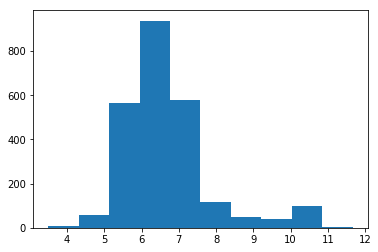

In [11]:
plt.hist(np.log(y))

In [12]:
y1=np.log(y)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df)

array([[ 1.0242031 ,  0.40329864, -0.85981681, ..., -0.01689826,
        -0.01689826, -0.01689826],
       [ 0.01915136, -0.4529166 ,  0.28741344, ..., -0.01689826,
        -0.01689826, -0.01689826],
       [ 0.3541686 ,  1.25951388, -1.08926286, ..., -0.01689826,
        -0.01689826, -0.01689826],
       ...,
       [ 0.3541686 , -0.88102421, -1.08926286, ..., -0.01689826,
        -0.01689826, -0.01689826],
       [-0.56712882, -1.30913183,  0.05796739, ..., -0.01689826,
        -0.01689826, -0.01689826],
       [ 0.01915136, -1.73723945, -1.08926286, ..., -0.01689826,
        -0.01689826, -0.01689826]])

In [14]:
df_train=df.iloc[:2452,:]
df_test=df.iloc[2452:,:]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_cv,y_train,y_cv=train_test_split(df_train,y1,test_size=0.25,random_state=1234)

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from math import sqrt
gb=GradientBoostingRegressor(max_depth=7)
gb.fit(x_train,y_train)
gb_cv=gb.predict(x_cv)
print(sqrt(mean_squared_log_error(y_cv,gb_cv)))

0.08731462965258238


In [18]:
gb_pred=gb.predict(df_test)

In [19]:
import catboost
from catboost import CatBoostRegressor
cb=CatBoostRegressor(learning_rate=0.2,max_depth=7)
cb.fit(x_train,y_train)
cb_cv=cb.predict(x_cv)

0:	learn: 1.0762846	total: 123ms	remaining: 2m 3s
1:	learn: 1.0025388	total: 146ms	remaining: 1m 13s
2:	learn: 0.9412208	total: 174ms	remaining: 57.9s
3:	learn: 0.9009359	total: 200ms	remaining: 49.8s
4:	learn: 0.8684889	total: 244ms	remaining: 48.5s
5:	learn: 0.8395485	total: 321ms	remaining: 53.1s
6:	learn: 0.8155712	total: 356ms	remaining: 50.6s
7:	learn: 0.7942736	total: 392ms	remaining: 48.6s
8:	learn: 0.7832659	total: 441ms	remaining: 48.5s
9:	learn: 0.7725884	total: 465ms	remaining: 46.1s
10:	learn: 0.7713248	total: 488ms	remaining: 43.9s
11:	learn: 0.7624936	total: 515ms	remaining: 42.4s
12:	learn: 0.7600087	total: 552ms	remaining: 41.9s
13:	learn: 0.7503930	total: 610ms	remaining: 43s
14:	learn: 0.7418422	total: 637ms	remaining: 41.8s
15:	learn: 0.7394289	total: 661ms	remaining: 40.7s
16:	learn: 0.7348904	total: 684ms	remaining: 39.6s
17:	learn: 0.7297598	total: 714ms	remaining: 38.9s
18:	learn: 0.7252151	total: 760ms	remaining: 39.2s
19:	learn: 0.7232390	total: 787ms	remainin

163:	learn: 0.5079865	total: 5.32s	remaining: 27.1s
164:	learn: 0.5075255	total: 5.38s	remaining: 27.2s
165:	learn: 0.5070504	total: 5.5s	remaining: 27.6s
166:	learn: 0.5066035	total: 5.54s	remaining: 27.7s
167:	learn: 0.5057342	total: 5.57s	remaining: 27.6s
168:	learn: 0.5051017	total: 5.59s	remaining: 27.5s
169:	learn: 0.5046609	total: 5.61s	remaining: 27.4s
170:	learn: 0.5033066	total: 5.64s	remaining: 27.3s
171:	learn: 0.5025691	total: 5.66s	remaining: 27.3s
172:	learn: 0.5021240	total: 5.69s	remaining: 27.2s
173:	learn: 0.5016851	total: 5.76s	remaining: 27.3s
174:	learn: 0.5012538	total: 5.84s	remaining: 27.5s
175:	learn: 0.5008265	total: 5.93s	remaining: 27.8s
176:	learn: 0.5003971	total: 6.03s	remaining: 28s
177:	learn: 0.4999703	total: 6.05s	remaining: 28s
178:	learn: 0.4980828	total: 6.08s	remaining: 27.9s
179:	learn: 0.4976567	total: 6.11s	remaining: 27.8s
180:	learn: 0.4972381	total: 6.21s	remaining: 28.1s
181:	learn: 0.4965829	total: 6.26s	remaining: 28.1s
182:	learn: 0.496

327:	learn: 0.4115053	total: 11.7s	remaining: 24s
328:	learn: 0.4112580	total: 11.8s	remaining: 24s
329:	learn: 0.4098041	total: 11.8s	remaining: 23.9s
330:	learn: 0.4095466	total: 11.8s	remaining: 23.9s
331:	learn: 0.4090559	total: 11.8s	remaining: 23.8s
332:	learn: 0.4088025	total: 11.9s	remaining: 23.7s
333:	learn: 0.4085476	total: 11.9s	remaining: 23.7s
334:	learn: 0.4082979	total: 12s	remaining: 23.8s
335:	learn: 0.4080501	total: 12s	remaining: 23.7s
336:	learn: 0.4078023	total: 12s	remaining: 23.7s
337:	learn: 0.4075029	total: 12.1s	remaining: 23.6s
338:	learn: 0.4072560	total: 12.1s	remaining: 23.6s
339:	learn: 0.4069416	total: 12.1s	remaining: 23.5s
340:	learn: 0.4064694	total: 12.1s	remaining: 23.5s
341:	learn: 0.4058310	total: 12.2s	remaining: 23.4s
342:	learn: 0.4054885	total: 12.2s	remaining: 23.4s
343:	learn: 0.4036308	total: 12.2s	remaining: 23.3s
344:	learn: 0.4034009	total: 12.3s	remaining: 23.3s
345:	learn: 0.4031554	total: 12.3s	remaining: 23.2s
346:	learn: 0.4021242	

488:	learn: 0.3595018	total: 16.4s	remaining: 17.1s
489:	learn: 0.3593303	total: 16.4s	remaining: 17.1s
490:	learn: 0.3591769	total: 16.4s	remaining: 17s
491:	learn: 0.3590064	total: 16.5s	remaining: 17s
492:	learn: 0.3588372	total: 16.5s	remaining: 17s
493:	learn: 0.3587050	total: 16.5s	remaining: 16.9s
494:	learn: 0.3584200	total: 16.5s	remaining: 16.9s
495:	learn: 0.3582521	total: 16.6s	remaining: 16.8s
496:	learn: 0.3572057	total: 16.6s	remaining: 16.8s
497:	learn: 0.3570378	total: 16.6s	remaining: 16.7s
498:	learn: 0.3568713	total: 16.6s	remaining: 16.7s
499:	learn: 0.3567228	total: 16.7s	remaining: 16.7s
500:	learn: 0.3558989	total: 16.7s	remaining: 16.6s
501:	learn: 0.3557285	total: 16.7s	remaining: 16.6s
502:	learn: 0.3554904	total: 16.8s	remaining: 16.6s
503:	learn: 0.3553214	total: 16.8s	remaining: 16.5s
504:	learn: 0.3551558	total: 16.8s	remaining: 16.5s
505:	learn: 0.3550199	total: 16.8s	remaining: 16.4s
506:	learn: 0.3548537	total: 16.9s	remaining: 16.4s
507:	learn: 0.3547

651:	learn: 0.3208354	total: 21.1s	remaining: 11.2s
652:	learn: 0.3207221	total: 21.1s	remaining: 11.2s
653:	learn: 0.3205968	total: 21.1s	remaining: 11.2s
654:	learn: 0.3204857	total: 21.1s	remaining: 11.1s
655:	learn: 0.3203632	total: 21.2s	remaining: 11.1s
656:	learn: 0.3202583	total: 21.2s	remaining: 11.1s
657:	learn: 0.3201355	total: 21.2s	remaining: 11s
658:	learn: 0.3200141	total: 21.3s	remaining: 11s
659:	learn: 0.3195839	total: 21.3s	remaining: 11s
660:	learn: 0.3194878	total: 21.3s	remaining: 10.9s
661:	learn: 0.3193671	total: 21.4s	remaining: 10.9s
662:	learn: 0.3192101	total: 21.4s	remaining: 10.9s
663:	learn: 0.3190864	total: 21.4s	remaining: 10.8s
664:	learn: 0.3189649	total: 21.4s	remaining: 10.8s
665:	learn: 0.3188445	total: 21.5s	remaining: 10.8s
666:	learn: 0.3184665	total: 21.5s	remaining: 10.7s
667:	learn: 0.3183512	total: 21.5s	remaining: 10.7s
668:	learn: 0.3182357	total: 21.5s	remaining: 10.7s
669:	learn: 0.3181151	total: 21.6s	remaining: 10.6s
670:	learn: 0.3179

815:	learn: 0.2857484	total: 25.9s	remaining: 5.84s
816:	learn: 0.2856548	total: 25.9s	remaining: 5.81s
817:	learn: 0.2855583	total: 26s	remaining: 5.78s
818:	learn: 0.2854622	total: 26s	remaining: 5.74s
819:	learn: 0.2846601	total: 26s	remaining: 5.71s
820:	learn: 0.2845630	total: 26s	remaining: 5.67s
821:	learn: 0.2844671	total: 26.1s	remaining: 5.64s
822:	learn: 0.2843779	total: 26.1s	remaining: 5.61s
823:	learn: 0.2842750	total: 26.1s	remaining: 5.58s
824:	learn: 0.2841854	total: 26.1s	remaining: 5.54s
825:	learn: 0.2839476	total: 26.2s	remaining: 5.51s
826:	learn: 0.2838175	total: 26.2s	remaining: 5.48s
827:	learn: 0.2837392	total: 26.2s	remaining: 5.45s
828:	learn: 0.2836450	total: 26.2s	remaining: 5.41s
829:	learn: 0.2835510	total: 26.3s	remaining: 5.39s
830:	learn: 0.2834558	total: 26.4s	remaining: 5.36s
831:	learn: 0.2828892	total: 26.4s	remaining: 5.33s
832:	learn: 0.2827958	total: 26.4s	remaining: 5.29s
833:	learn: 0.2827026	total: 26.4s	remaining: 5.26s
834:	learn: 0.282616

979:	learn: 0.2628418	total: 32.6s	remaining: 666ms
980:	learn: 0.2627717	total: 32.8s	remaining: 635ms
981:	learn: 0.2627032	total: 32.8s	remaining: 602ms
982:	learn: 0.2626366	total: 32.9s	remaining: 568ms
983:	learn: 0.2625626	total: 32.9s	remaining: 535ms
984:	learn: 0.2624885	total: 32.9s	remaining: 501ms
985:	learn: 0.2624164	total: 32.9s	remaining: 468ms
986:	learn: 0.2623428	total: 33s	remaining: 434ms
987:	learn: 0.2622765	total: 33s	remaining: 401ms
988:	learn: 0.2621896	total: 33s	remaining: 368ms
989:	learn: 0.2621160	total: 33.1s	remaining: 335ms
990:	learn: 0.2620286	total: 33.2s	remaining: 301ms
991:	learn: 0.2619422	total: 33.3s	remaining: 268ms
992:	learn: 0.2618693	total: 33.3s	remaining: 235ms
993:	learn: 0.2617965	total: 33.4s	remaining: 201ms
994:	learn: 0.2614539	total: 33.4s	remaining: 168ms
995:	learn: 0.2608721	total: 33.5s	remaining: 134ms
996:	learn: 0.2607975	total: 33.6s	remaining: 101ms
997:	learn: 0.2607335	total: 33.6s	remaining: 67.4ms
998:	learn: 0.260

In [20]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt
print(sqrt(mean_squared_log_error(y_cv,cb_cv)))

0.08249261123197128


In [21]:
cb_pred=cb.predict(df_test)

In [22]:
sample=pd.read_excel('Sample_Submission.xlsx')

In [23]:
sample.Selling_Price=np.exp(cb_pred)

In [24]:
sample.head()

,Selling_Price
0,2837.872626
1,462.606027
2,798.052245
3,337.091216
4,748.974244


In [25]:
sample.to_excel('cb_l_2_md_7.xlsx',index=False)